In [1]:
# Read the csv file and load it into a pandas dataframe.

# Importing the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the diabetes dataset
df = pd.read_csv('/Users/viedamayanti/Desktop/Data-Glacier/Week4/diabetes.csv') 

In [3]:
# Exploratory Data Analysis (EDA)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Data Understanding: I read the dataset and understand what each feature represents. What is the potential relevance feature for diabetes prediction.

Feature relevance for diabetes:

•	Glucose Levels: Among the most critical predictors for diabetes.

•	BMI (Body Mass Index): High BMI often correlates with diabetes risk.

•	Age: Age can be a significant factor in diabetes risk assessment.

•	Insulin Levels: Relevant but might have multicollinearity with other features.

•	Pregnancies: Relevant for gestational diabetes prediction (in females).

•	Blood Pressure: Can be relevant but might have less direct impact compared to glucose or BMI.

•	Skin Thickness: Might have less direct impact compared to other features.

•	Diabetes Pedigree Function: Measures genetic predisposition, but might have less impact alone.


In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# This format is more easy to understand
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [8]:
# Check null values
def check_null(df):
    return df.isnull().sum()
print(check_null(df))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
# Check the specific columns before replacement
print(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].head(2))

# Make the replacement
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Check the specific columns after replacement
print(df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].head(2))


   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0      148             72             35        0  33.6
1       85             66             29        0  26.6
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0      NaN  33.6
1     85.0           66.0           29.0      NaN  26.6


In [10]:
check_null(df_copy)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

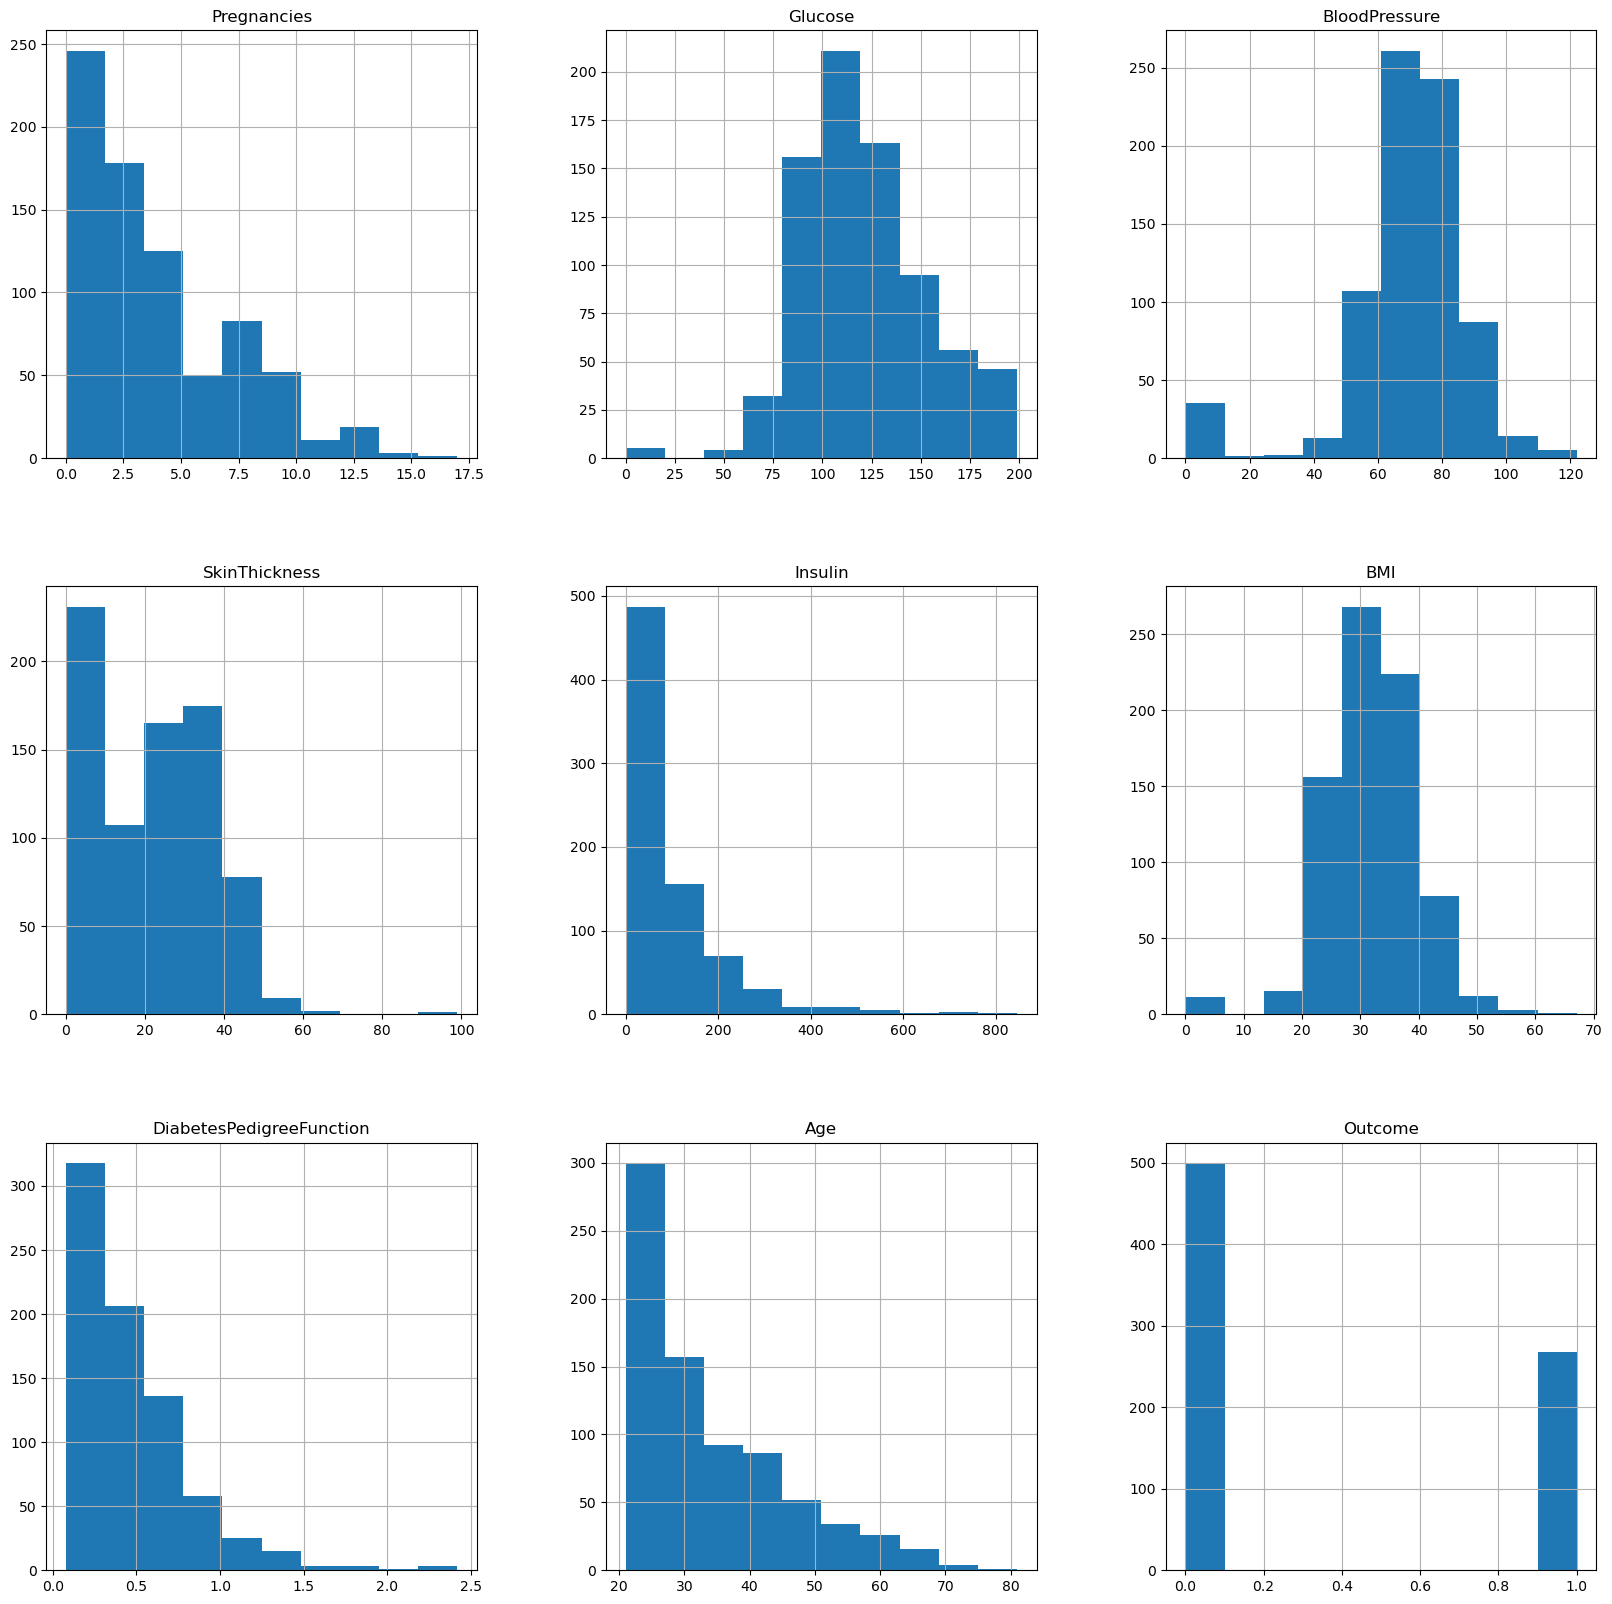

In [11]:
# Data Visualization 
# With NaN values
plot = df.hist(figsize=(20,20))

In [12]:
# As it not supposed to have a NaN dataset then we need to fill up the NaN value either with the mean or median 
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

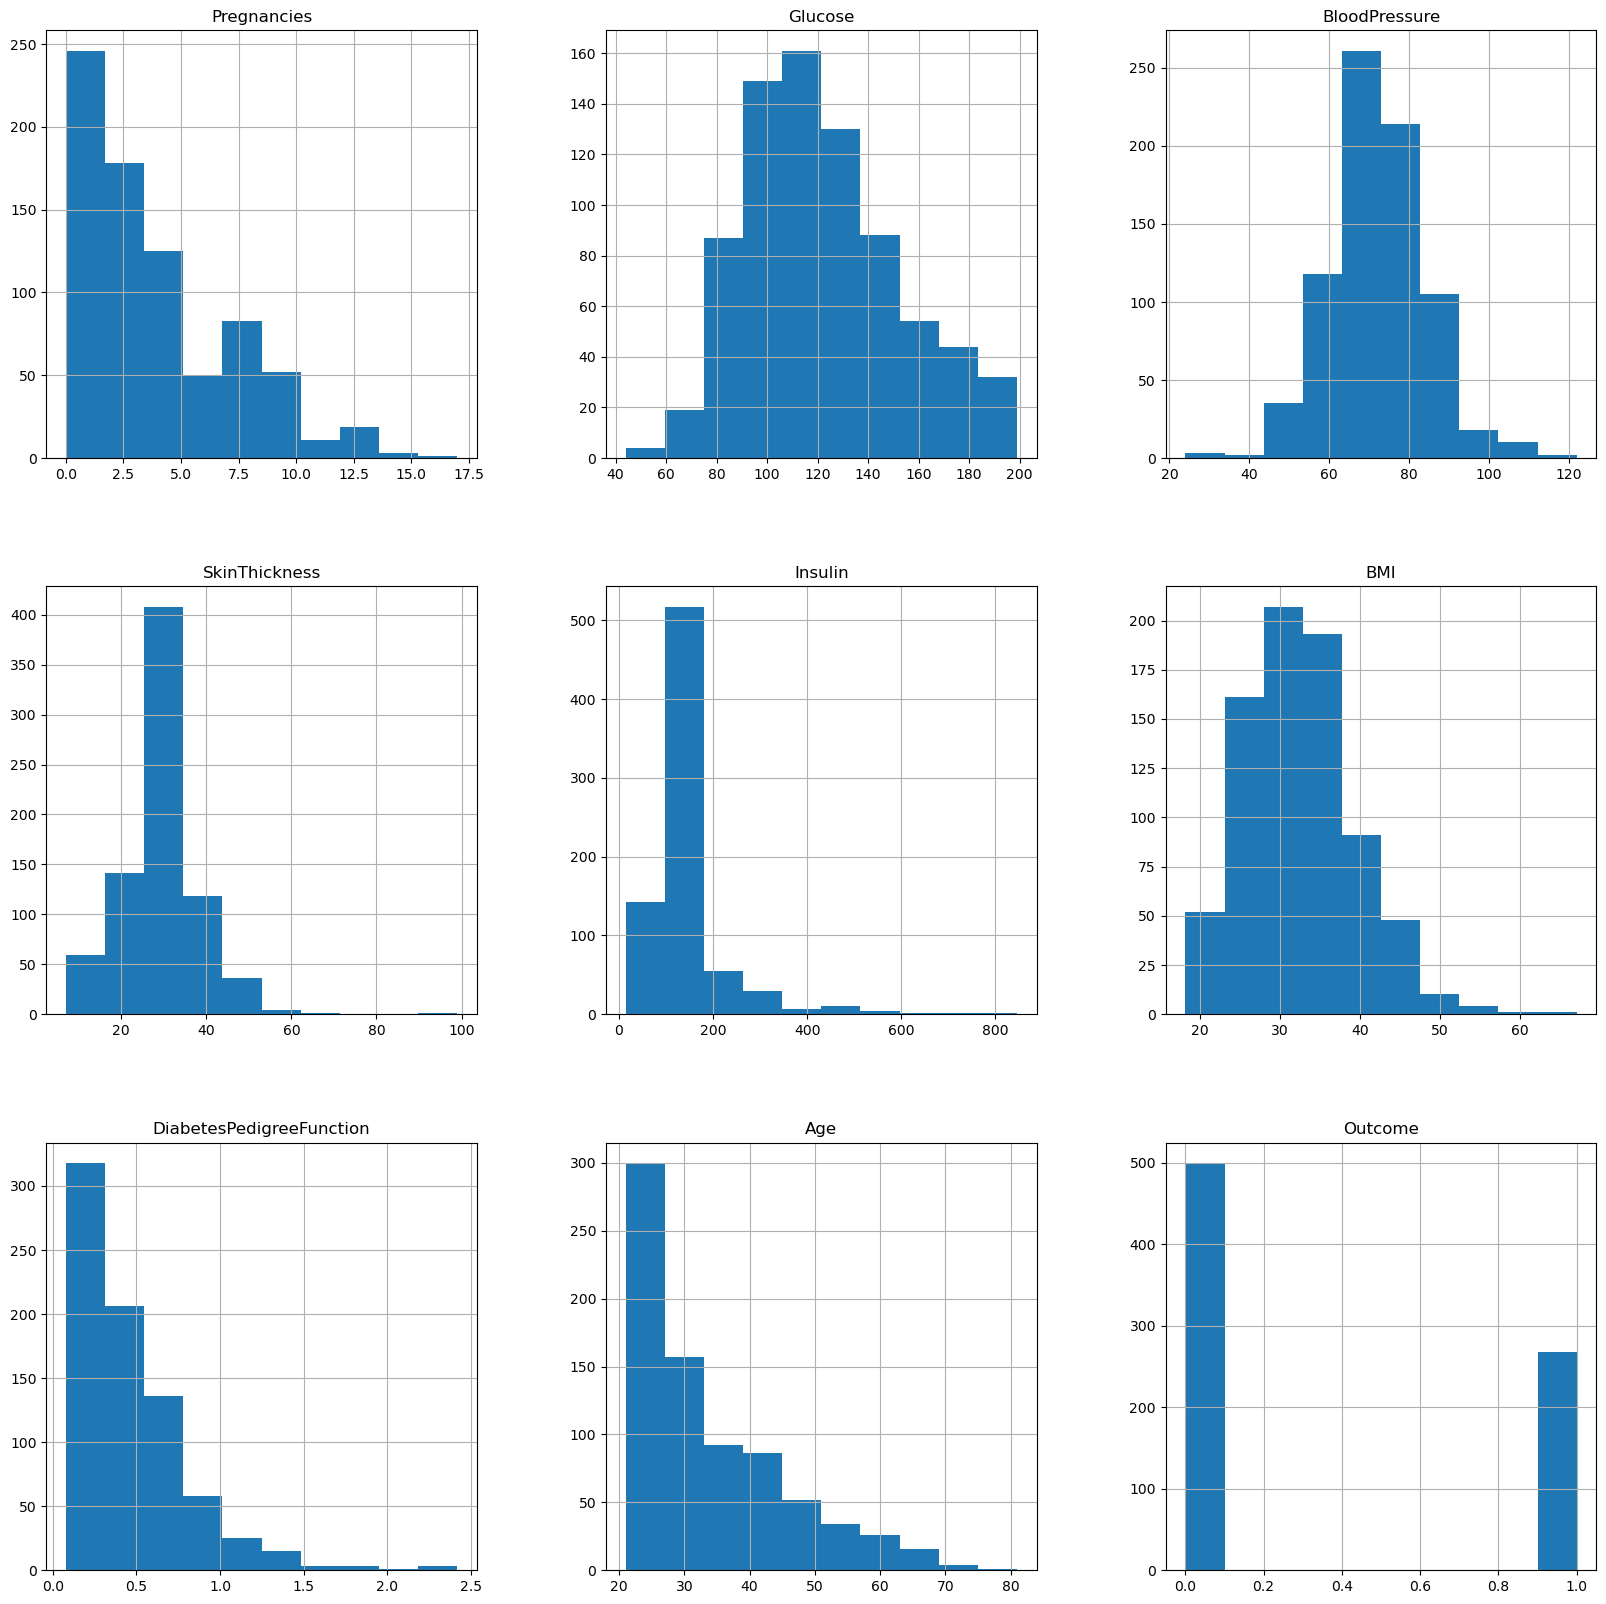

In [13]:
plot = df_copy.hist(figsize=(20,20))

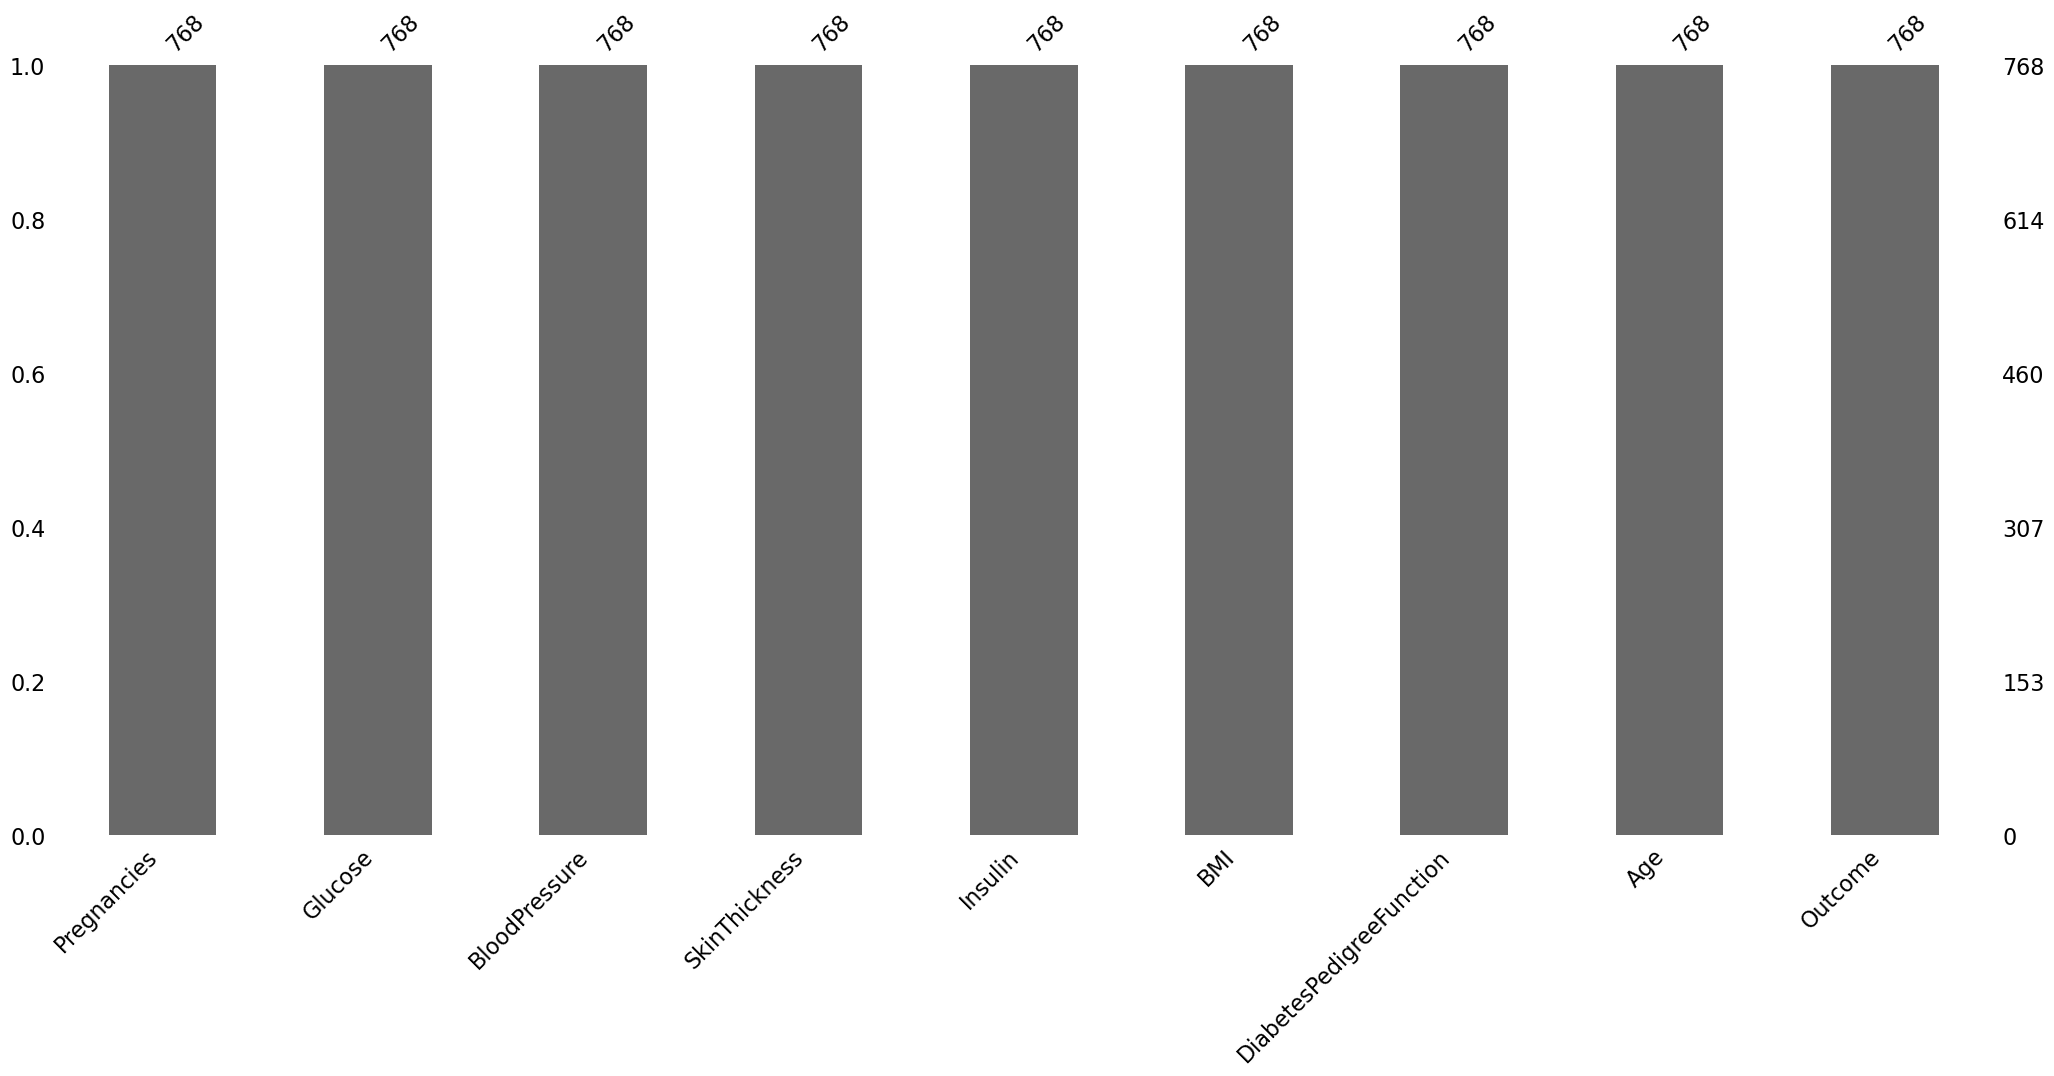

In [14]:
# Plot null values
import missingno as msno
plot = msno.bar(df)

All missing values are filling up

In [15]:
plot_outcome = df['Outcome'].value_counts()
print(plot_outcome)

Outcome
0    500
1    268
Name: count, dtype: int64


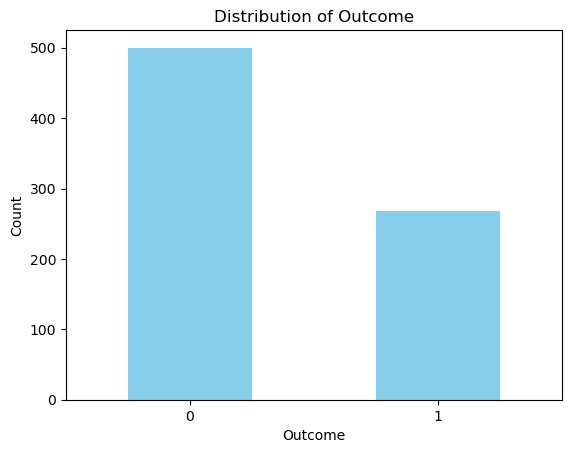

In [16]:
# Plotting the outcome distribution
plot_outcome.plot(kind='bar', color='skyblue')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.xticks(rotation=0) 
plt.show()

The number of people without diabetes, based on the data, is double that of those with diabetes. '0' indicates non-diabetes while '1' identifies diabetes

In [17]:
# Correlation between all feature 
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Compute the correlation matrix
correlation_matrix = df_copy[selected_columns].corr()


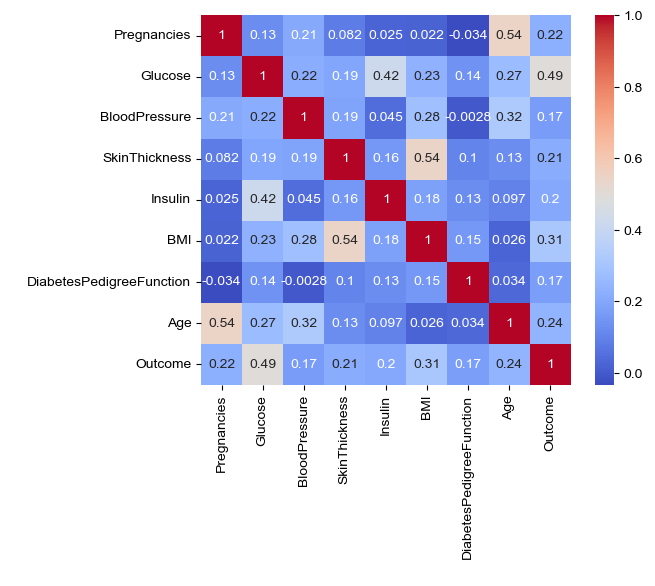

<Figure size 1200x1000 with 0 Axes>

In [18]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
sns.set(font_scale=0.7) 
plt.figure(figsize=(12,10))
plt.show()

Roughly 49% of the features relate to Glucose, while 31% correspond to BMI and their association with the diabetes outcome

In [19]:
# Check duplicate data
df.duplicated().sum()

0

Splitting the data involves segregating 'y' as the diabetes column, which holds binary values, while 'x' represents the remaining eight columns. In total, there are nine columns

In [21]:
# Data Splitting 
from sklearn.model_selection import train_test_split

In [22]:
y = df_copy['Outcome']

In [23]:
X = df_copy.drop('Outcome', axis = 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

In [25]:
# Scale the data into 0 to 1
from sklearn.preprocessing import StandardScaler


In [26]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
scaler_X = StandardScaler()
X = pd.DataFrame(scaler_X.fit_transform(df_copy[feature_columns]))
X.columns = feature_columns 
X.head(3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584


In [28]:
# Build the model 
# I'm experimenting with various models to determine the most effective one for use
# 1. Linear regression
from sklearn.linear_model import LinearRegression


In [37]:
# Training the model 
linReg = LinearRegression()
linReg.fit(X_train, y_train)

LinearRegression()

In [30]:
# Applying the model to make a prediction 
y_linReg_train_pred = linReg.predict(X_train)
y_linReg_test_pred = linReg.predict(X_test)

In [31]:
# Evaluate model performance 
from sklearn.metrics import mean_squared_error, r2_score
linReg_train_mse = mean_squared_error(y_train, y_linReg_train_pred)
linReg_train_r2 = mean_squared_error(y_train, y_linReg_train_pred)
linReg_test_mse = mean_squared_error(y_test, y_linReg_test_pred)
linReg_test_r2 = mean_squared_error(y_test, y_linReg_test_pred)

In [32]:
linReg_results = pd.DataFrame(['LinearRegression', linReg_train_mse, linReg_train_r2, linReg_test_mse, linReg_test_r2]).transpose()
linReg_results.columns = ['Method', 'Training_MSE', 'Training_R2', 'Test_MSE', 'Test_R2']
linReg_results

,Method,Training_MSE,Training_R2,Test_MSE,Test_R2
0,LinearRegression,0.151148,0.151148,0.164682,0.164682


In [33]:
# 2. Random Forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [34]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [35]:
# Evaluate model performance 
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = mean_squared_error(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = mean_squared_error(y_test, y_rf_test_pred)

In [36]:
rf_results = pd.DataFrame(['RandomForest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training_MSE', 'Training_R2', 'Test_MSE', 'Test_R2']
rf_results

,Method,Training_MSE,Training_R2,Test_MSE,Test_R2
0,RandomForest,0.15067,0.15067,0.171821,0.171821


In [38]:
# 3.K-Nearest Neighbor KNN
from sklearn.neighbors import KNeighborsClassifier

In [39]:
train_score = []
test_score = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))


In [40]:
max_train_score = max(train_score)
max_train_score

1.0

In [41]:
max_test_score = max(test_score)
max_test_score

0.73828125

In [42]:
best_k = test_score.index(max(test_score)) + 1  # Index starts at 0, so add 1
best_test_accuracy = max(test_score)
best_train_accuracy = train_score[best_k - 1]  # Using the index of best_k

print(f"Best K value: {best_k}")
print(f"Best Test Accuracy: {best_test_accuracy}")
print(f"Corresponding Train Accuracy: {best_train_accuracy}")

Best K value: 8
Best Test Accuracy: 0.73828125
Corresponding Train Accuracy: 0.796875


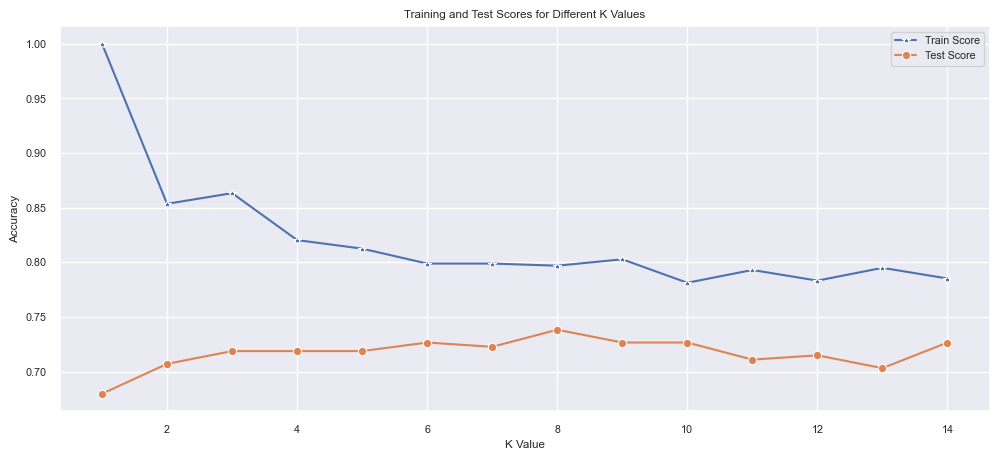

In [49]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(1, 15), y=train_score, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_score, marker='o', label='Test Score')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Training and Test Scores for Different K Values')
plt.legend()
plt.show()

In [50]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.73828125

In [51]:
from sklearn.metrics import confusion_matrix

Accuracy: 0.73828125


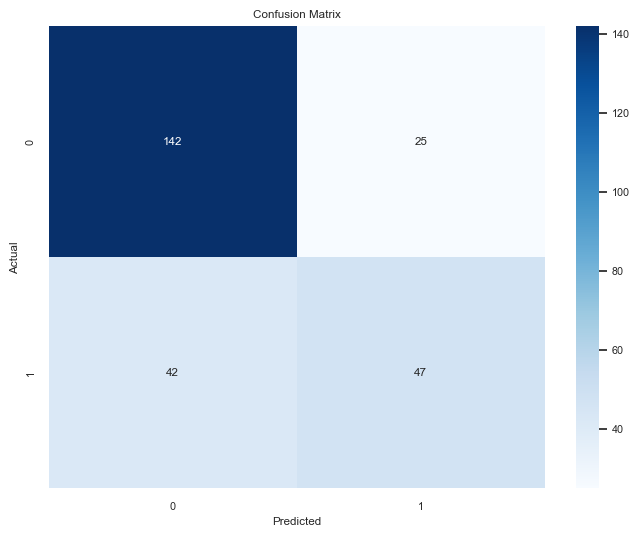

In [52]:
# Train the model
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)

# Get the accuracy score
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Predict on test data
y_pred = knn.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Classification Reports 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       167
           1       0.65      0.53      0.58        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.70       256
weighted avg       0.73      0.74      0.73       256



In [59]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])
print(max(y_pred_probs))

[0.05938508 0.34256611 0.28935771 0.33551428 0.42916839 0.36856221
 0.79762317 0.83279441 0.01553784 0.20563397]
0.9905229360743918


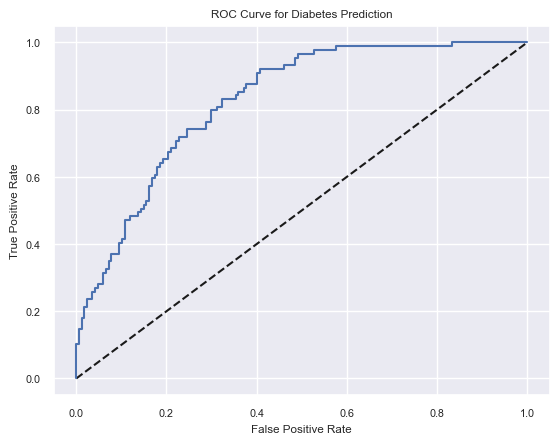

In [61]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [66]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
roc_score = roc_auc_score(y_test, y_pred_probs)
print(f"ROC AUC Score: {roc_score}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"ROC Confusion Matrix:")
print(conf_matrix)

# Calculate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


ROC AUC Score: 0.8254726502052075
ROC Confusion Matrix:
[[142  25]
 [ 42  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       167
           1       0.65      0.53      0.58        89

    accuracy                           0.74       256
   macro avg       0.71      0.69      0.70       256
weighted avg       0.73      0.74      0.73       256



In [69]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Define the range of alpha values

# Create GridSearchCV instance
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the data to find the best alpha value
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test Set Score: {test_score}")

Best Parameters: {'alpha': 0.01}
Best Score: -0.1575456862581826
Test Set Score: 0.2610219094998484
